# Programs BEGINNER

Esta tabla contiene la información a nivel de programa.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'program__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('programs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2025-01-13 11:22:48.091541 Data cache files found ...
2025-01-13 11:22:48.091541 Data cache files successfully loaded!!
The dataset contains 1591 (99.87%) instances for BEGINNER class and 0 (0.0%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name and features.
TABLE_NAME = 'programs'
TABLE_FEATURES = ['program__has_sub_dirs_with_code','program__has_packages','program__number_of_modules','program__number_of_sub_dirs_with_code','program__number_of_packages','program__class_defs_pct','program__function_defs_pct','program__enum_defs_pct','program__has_code_root_package','program__average_defs_per_module']

# Load features.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

 BEGINNER CLASS Features shape: (1591, 10)
As we can see the downloaded data contains a total of 1591 instances of BEGINNER. Each of the instances corresponds to a program. For each program we have 10 attributes.


## 2 - Exploracion de datos

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1591 entries, 2 to 1592
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   program__has_sub_dirs_with_code        1591 non-null   bool   
 1   program__has_packages                  1591 non-null   bool   
 2   program__number_of_modules             1591 non-null   int64  
 3   program__number_of_sub_dirs_with_code  1591 non-null   int64  
 4   program__number_of_packages            1591 non-null   int64  
 5   program__class_defs_pct                1591 non-null   float64
 6   program__function_defs_pct             1591 non-null   float64
 7   program__enum_defs_pct                 1591 non-null   float64
 8   program__has_code_root_package         1591 non-null   bool   
 9   program__average_defs_per_module       1591 non-null   float64
dtypes: bool(3), float64(4), int64(3)
memory usage: 104.1 KB
None


Cómo podemos ver la tabla está compuesta por 7 variables numéricas, 3 variables boleanas.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

program__has_sub_dirs_with_code          0
program__has_packages                    0
program__number_of_modules               0
program__number_of_sub_dirs_with_code    0
program__number_of_packages              0
program__class_defs_pct                  0
program__function_defs_pct               0
program__enum_defs_pct                   0
program__has_code_root_package           0
program__average_defs_per_module         0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [5]:
print_empty_cols(X)

program__has_sub_dirs_with_code
-------------------------------
0 instancias no tienen un valor para la columna program__has_sub_dirs_with_code


program__has_packages
---------------------
0 instancias no tienen un valor para la columna program__has_packages


program__number_of_modules
--------------------------
0 instancias no tienen un valor para la columna program__number_of_modules


program__number_of_sub_dirs_with_code
-------------------------------------
0 instancias no tienen un valor para la columna program__number_of_sub_dirs_with_code


program__number_of_packages
---------------------------
0 instancias no tienen un valor para la columna program__number_of_packages


program__class_defs_pct
-----------------------
0 instancias no tienen un valor para la columna program__class_defs_pct


program__function_defs_pct
--------------------------
0 instancias no tienen un valor para la columna program__function_defs_pct


program__enum_defs_pct
----------------------
0 instanci

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,1591,2,False,1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__has_packages,1591,1,False,1591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__number_of_modules,1591.0,NaN,NaN,NaN,2.460717,1.690018,1.0,1.0,3.0,3.0,25.0
program__number_of_sub_dirs_with_code,1591.0,NaN,NaN,NaN,0.023256,0.245897,0.0,0.0,0.0,0.0,8.0
program__number_of_packages,1591.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
program__class_defs_pct,1591.0,NaN,NaN,NaN,0.006071,0.064997,0.0,0.0,0.0,0.0,1.0
program__function_defs_pct,1591.0,NaN,NaN,NaN,0.652006,0.474578,0.0,0.0,1.0,1.0,1.0
program__enum_defs_pct,1591.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
program__has_code_root_package,1591,1,True,1591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__average_defs_per_module,1591.0,NaN,NaN,NaN,1.7659,2.940478,0.0,0.0,0.666667,2.0,26.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "program__class_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "program__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "program__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.19
    "program__number_of_modules": [(1, 1), (2,2), (3,3), (4,inf)],  # min: 1 max: 3294
    "program__number_of_sub_dirs_with_code": [(0, 0), (0, inf)], # min: 0 max: 238
    "program__number_of_packages": [(0, 0), (0, inf)], # min: 0 max: 1297
    "program__average_defs_per_module": [(0, 0), (0, 1), (1, 3), (3, inf)], # min: 0 max: 26    
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code'], 10))
print(get_statistics(X_copy, ['program__has_packages'], 10))
print(get_statistics(X_copy, ['program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct'], 10))
print(get_statistics(X_copy, ['program__function_defs_pct'], 10))
print(get_statistics(X_copy, ['program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code'], 10))
print(get_statistics(X_copy, ['program__number_of_modules'], 10))
print(get_statistics(X_copy, ['program__number_of_packages'], 10))
print(get_statistics(X_copy, ['program__average_defs_per_module'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages'], 10))
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__has_packages', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__function_defs_pct'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__function_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_modules'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_packages'], 10))
print(get_statistics(X_copy, ['program__number_of_modules', 'program__number_of_packages'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__function_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_modules', 'program__number_of_packages'], 10))

--- SINGLE FEATURE ---
 program__has_sub_dirs_with_code  count  percentage
                           False   1563   98.240101
                            True     28    1.759899

 program__has_packages  count  percentage
                 False   1591       100.0

 program__has_code_root_package  count  percentage
                           True   1591       100.0

program__class_defs_pct  count  percentage
              [0.0_0.0]   1566   98.428661
              [0.0_inf]     25    1.571339

program__function_defs_pct  count  percentage
                 [1.0_1.0]   1022   64.236329
                 [0.0_0.0]    547   34.380893
                 [0.0_1.0)     22    1.382778

program__enum_defs_pct  count  percentage
             [0.0_0.0]   1591       100.0

program__number_of_sub_dirs_with_code  count  percentage
                                [0_0]   1563   98.240101
                              [0_inf]     28    1.759899

program__number_of_modules  count  percentage
              

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (1591, 10)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

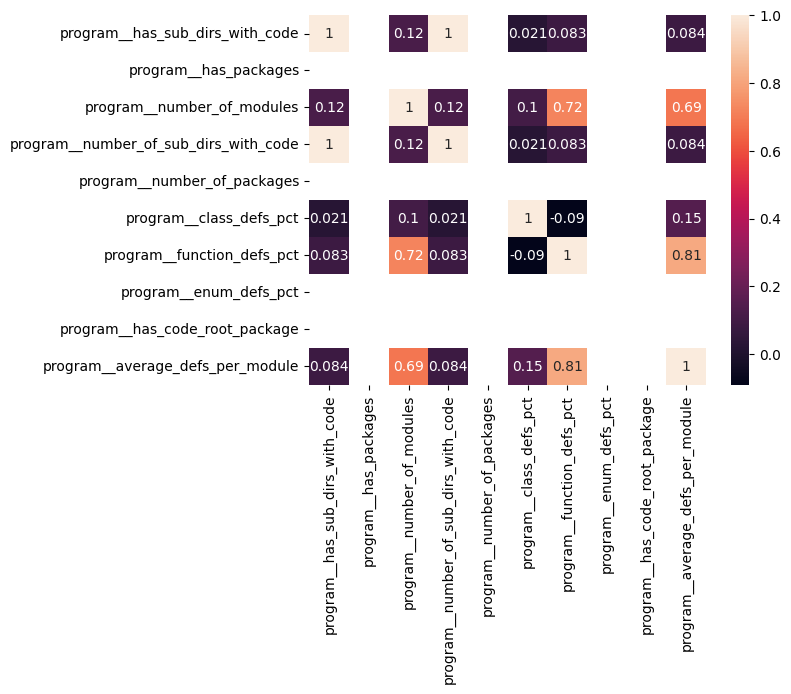

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado

### Variable has_sub_dirs_with_code (1/10)
Esta variable es de tipo booleano y representa si el programa contiene algún subdirectorio con código.

<Axes: xlabel='program__has_sub_dirs_with_code', ylabel='Count'>

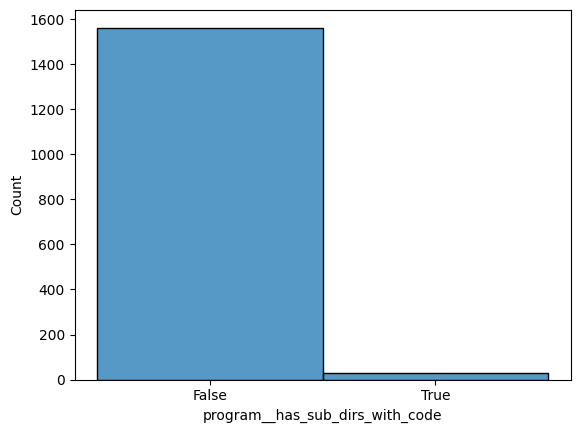

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_sub_dirs_with_code'], discrete=True)

In [11]:
num_true_values = len(X[X['program__has_sub_dirs_with_code'] == True])
num_false_values = len(X[X['program__has_sub_dirs_with_code'] == False])
std = X['program__has_sub_dirs_with_code'].std()
freq_true = len(X[X['program__has_sub_dirs_with_code'] == True]) / len(X['program__has_sub_dirs_with_code'])
freq_false = len(X[X['program__has_sub_dirs_with_code'] == False]) / len(X['program__has_sub_dirs_with_code'])
print(f'La variable has_sub_dirs_with_code contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es {freq_false}.')

La variable has_sub_dirs_with_code contiene 28 valores verdaderos y 1563 valores falsos. Y, la desviación típica es de 0.1315300166606903
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es 0.01759899434318039.
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es 0.9824010056568196.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_sub_dirs_with_code', possible_values)

La variable program__has_sub_dirs_with_code contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_sub_dirs_with_code toma el valor de 0.0 en un 98.24% de los items.
La variable program__has_sub_dirs_with_code toma el valor de 1.0 en un 1.76% de los items.


Describimos los valores de las variables de la tabla, cuando la variable tiene el valor a True. 

In [13]:
X[X['program__has_sub_dirs_with_code'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,28.0,28.0,28.000000,28.000000,28.0,28.000000,28.000000,28.0,28.0,28.000000
mean,1.0,0.0,4.714286,1.321429,0.0,0.003968,0.960317,0.0,1.0,3.940680
std,0.0,0.0,4.454354,1.334821,0.0,0.020998,0.189371,0.0,0.0,4.781832
min,1.0,0.0,2.000000,1.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000
25%,1.0,0.0,3.000000,1.000000,0.0,0.000000,1.000000,0.0,1.0,0.666667
50%,1.0,0.0,3.000000,1.000000,0.0,0.000000,1.000000,0.0,1.0,1.500000
75%,1.0,0.0,4.500000,1.000000,0.0,0.000000,1.000000,0.0,1.0,7.000000
max,1.0,0.0,25.000000,8.000000,0.0,0.111111,1.000000,0.0,1.0,17.000000


### Variable has_packages (2/10)
Esta variable es de tipo booleano y representa si el programa contiene algún paquete.

<Axes: xlabel='program__has_packages', ylabel='Count'>

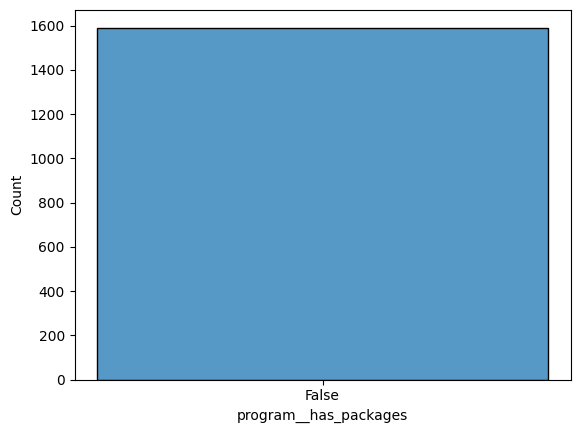

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_packages'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['program__has_packages'] == True])
num_false_values = len(X[X['program__has_packages'] == False])
std = X['program__has_packages'].std()
freq_true = len(X[X['program__has_packages'] == True]) / len(X['program__has_packages'])
freq_false = len(X[X['program__has_packages'] == False]) / len(X['program__has_packages'])
print(f'La variable program__has_packages contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable program__has_packages a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable program__has_packages a False es {freq_false}.')

La variable program__has_packages contiene 0 valores verdaderos y 1591 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable program__has_packages a True es 0.0.
La frecuencia con la que programa puede tener la variable program__has_packages a False es 1.0.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_packages', possible_values)

La variable program__has_packages contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_packages toma el valor de 0.0 en un 100.0% de los items.
La variable program__has_packages toma el valor de True en un 0.0% de los items. [OUTLIER]


Describimos los valores de las variables de la tabla, cuando la variable tiene el valor a True.

In [17]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['program__has_packages'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable has_code_root_packages (3/10)
Esta variable es de tipo booleano y representa si el programa contiene código en el directorio root.

<Axes: xlabel='program__has_code_root_package', ylabel='Count'>

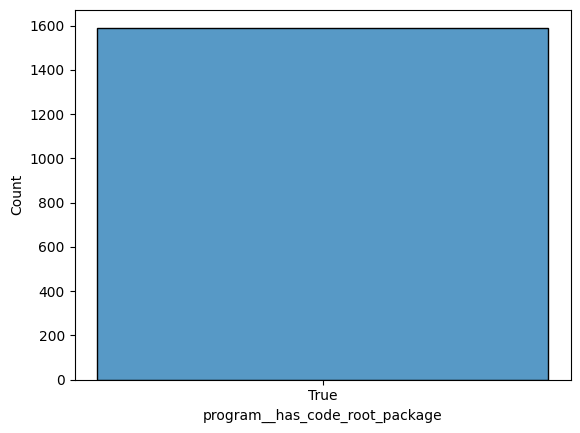

In [18]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_code_root_package'], discrete=True)

In [19]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['program__has_code_root_package'] == True])
num_false_values = len(X[X['program__has_code_root_package'] == False])
std = X['program__has_code_root_package'].std()
freq_true = len(X[X['program__has_code_root_package'] == True]) / len(X['program__has_code_root_package'])
freq_false = len(X[X['program__has_code_root_package'] == False]) / len(X['program__has_code_root_package'])
print(f'La variable program__has_code_root_package contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable program__has_code_root_package a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable program__has_code_root_package a False es {freq_false}.')

La variable program__has_code_root_package contiene 1591 valores verdaderos y 0 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable program__has_code_root_package a True es 1.0.
La frecuencia con la que programa puede tener la variable program__has_code_root_package a False es 0.0.


In [20]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_code_root_package', possible_values)

La variable program__has_code_root_package contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_code_root_package toma el valor de 1.0 en un 100.0% de los items.
La variable program__has_code_root_package toma el valor de False en un 0.0% de los items. [OUTLIER]


### IMPORTANTE

No hay ningun programa que tenga la variable program__has_code_root_package a False.

Describimos los valores de las variables de la tabla, cuando la variable tiene el valor a False.

In [21]:
X[X['program__has_code_root_package'] == False].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable number_of_modules (4/10)
Esta variable es de tipo numérica y nos indica el número de modulos definidos en el programa. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 544. Con una media de 4,47.

<Axes: ylabel='program__number_of_modules'>

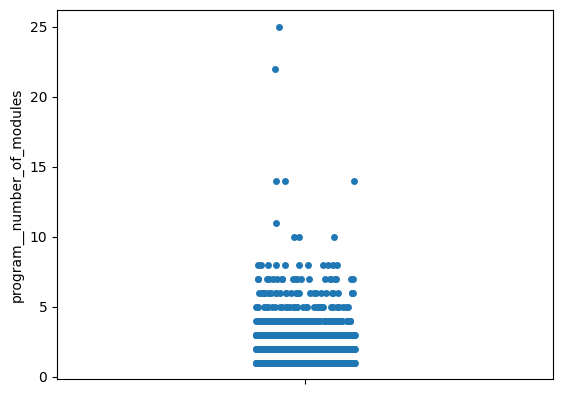

In [22]:
sns.stripplot(X['program__number_of_modules'])

### IMPORTANTE
Los valores máximos están muy alejados de los otros.

In [23]:
print_outliers_for_df_column(X, 'program__number_of_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4279017398754756
Rango valores atípicos extremos (Tukey): [-5.0,9.0]
Rango valores atípicos leves (Tukey): [-2.0,6.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.3290386879968732,19.613560312206786]
-3.0IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -5.0 (Q1-3*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -2.0 (Q1-1.5*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 40 instancias tienen un valor para program__number_of_modules superior a 6.0 (Q3+1.5*IQR) para program__number_of_modules. Representando un 2.514% del total de instancias.
+3.0IQR: 9 instancias tienen un valor para program__number_of_modules superior a 9.0 (Q3-3*IQR) para program__number_of_modules. Representando un 0.5657% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 148 (Con un MC de 97 usamos U)

In [24]:
X[X['program__number_of_modules'] > 148.39].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
Los casos extremos de alumnos puede deberse a la entrega de librerias python.

### Variable number_of_sub_dirs_with_code (5/10)
Esta variable representa el número de subdirectorios con ficheros python pero sin un __init__.py en ellos. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 8. Con una media de 0.039.

<Axes: ylabel='program__number_of_sub_dirs_with_code'>

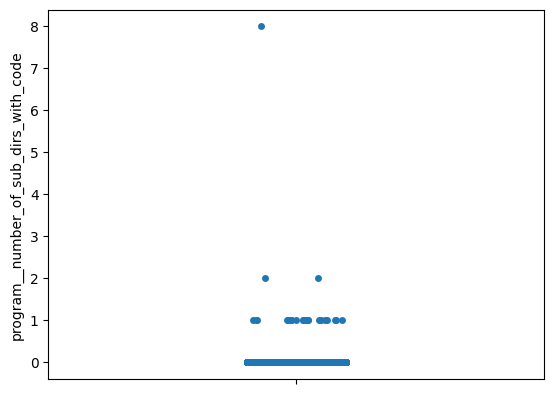

In [25]:
sns.stripplot(X['program__number_of_sub_dirs_with_code'])

El valor máximo está muy alejado del siguiente. 

In [26]:
print_outliers_for_df_column(X, 'program__number_of_sub_dirs_with_code')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9512587138915063
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code inferior a 0.0 (Q1-3*IQR) para program__number_of_sub_dirs_with_code. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code inferior a 0.0 (Q1-1.5*IQR) para program__number_of_sub_dirs_with_code. Representando un 0.0% del total de instancias.
+1.5IQR: 28 instancias tienen un valor para program__number_of_sub_dirs_with_code superior a 0.0 (Q3+1.5*IQR) para program__number_of_sub_dirs_with_code. Representando un 1.76% del total de instancias.
+3.0IQR: 28 instancias tienen un valor para program__number_of_sub_dirs_with_code superior a 0.0 (Q3-3*IQR) para program__number_of_sub_dirs_with_code. Representando

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [27]:
X[X['program__number_of_sub_dirs_with_code'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,28.0,28.0,28.000000,28.000000,28.0,28.000000,28.000000,28.0,28.0,28.000000
mean,1.0,0.0,4.714286,1.321429,0.0,0.003968,0.960317,0.0,1.0,3.940680
std,0.0,0.0,4.454354,1.334821,0.0,0.020998,0.189371,0.0,0.0,4.781832
min,1.0,0.0,2.000000,1.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000
25%,1.0,0.0,3.000000,1.000000,0.0,0.000000,1.000000,0.0,1.0,0.666667
50%,1.0,0.0,3.000000,1.000000,0.0,0.000000,1.000000,0.0,1.0,1.500000
75%,1.0,0.0,4.500000,1.000000,0.0,0.000000,1.000000,0.0,1.0,7.000000
max,1.0,0.0,25.000000,8.000000,0.0,0.111111,1.000000,0.0,1.0,17.000000


### Variable number_of_packages (6/10)
Esta variable representa el número de subdirectorios con ficheros python pero sin un __init__.py en ellos. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 73. Con una media de 0.27.

<Axes: ylabel='program__number_of_packages'>

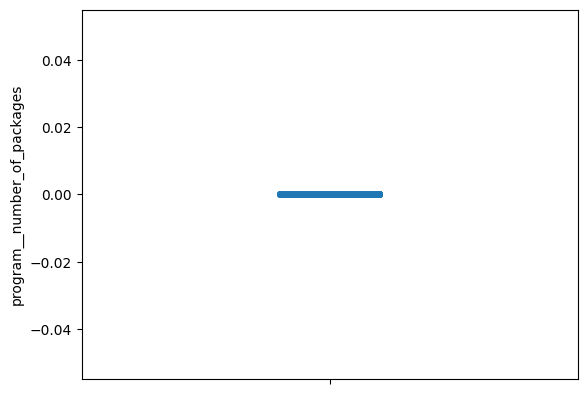

In [28]:
sns.stripplot(X['program__number_of_packages'])

### IMPORTANTE
Los valores máximos están muy alejados de los otros.

In [29]:
print_outliers_for_df_column(X, 'program__number_of_packages')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para program__number_of_packages inferior a 0.0 (Q1-3*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_packages inferior a 0.0 (Q1-1.5*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__number_of_packages superior a 0.0 (Q3+1.5*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__number_of_packages superior a 0.0 (Q3-3*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para program__number_of_packages

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [30]:
X[X['program__number_of_packages'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable average_defs_per_module (7/10)
Esta variable es de tipo numérica y nos indica el número medio de definiciones en un módulo. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 26. Con una media de 1.7.

<Axes: ylabel='program__average_defs_per_module'>

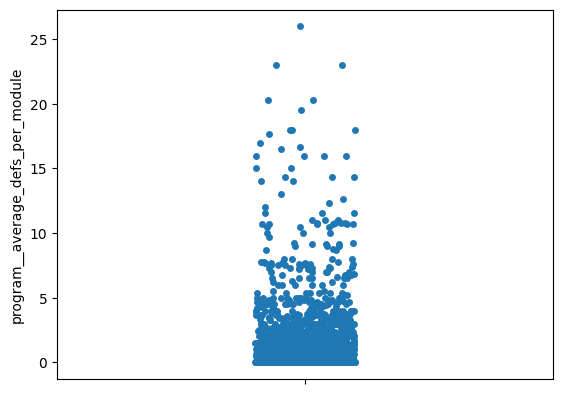

In [31]:
sns.stripplot(X['program__average_defs_per_module'])

In [32]:
print_outliers_for_df_column(X, 'program__average_defs_per_module')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8279259704254212
Rango valores atípicos extremos (Tukey): [-6.0,8.0]
Rango valores atípicos leves (Tukey): [-3.0,5.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.16544299115596928,84.29547878331407]
-3.0IQR: 0 instancias tienen un valor para program__average_defs_per_module inferior a -6.0 (Q1-3*IQR) para program__average_defs_per_module. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__average_defs_per_module inferior a -3.0 (Q1-1.5*IQR) para program__average_defs_per_module. Representando un 0.0% del total de instancias.
+1.5IQR: 126 instancias tienen un valor para program__average_defs_per_module superior a 5.0 (Q3+1.5*IQR) para program__average_defs_per_module. Representando un 7.92% del total de instancias.
+3.0IQR: 62 instancias tienen un valor para program__average_defs_per_module superior a 8.0 (Q3-3*IQR) para program__average_defs_per_module. Representando un 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 8 (Con un MC de 83 usamos Tuckey Extremo)

In [33]:
X[X['program__average_defs_per_module'] > 8].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,62.000000,62.0,62.000000,62.000000,62.0,62.000000,62.000000,62.0,62.0,62.000000
mean,0.080645,0.0,3.741935,0.080645,0.0,0.015428,0.984572,0.0,1.0,13.127841
std,0.274512,0.0,2.353480,0.274512,0.0,0.085191,0.085191,0.0,0.0,4.076472
min,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.521739,0.0,1.0,8.666667
25%,0.000000,0.0,1.250000,0.000000,0.0,0.000000,1.000000,0.0,1.0,10.500000
50%,0.000000,0.0,3.000000,0.000000,0.0,0.000000,1.000000,0.0,1.0,11.285714
75%,0.000000,0.0,6.000000,0.000000,0.0,0.000000,1.000000,0.0,1.0,16.000000
max,1.000000,0.0,10.000000,1.000000,0.0,0.478261,1.000000,0.0,1.0,26.000000


### Variable class_defs_pct (8/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.007.

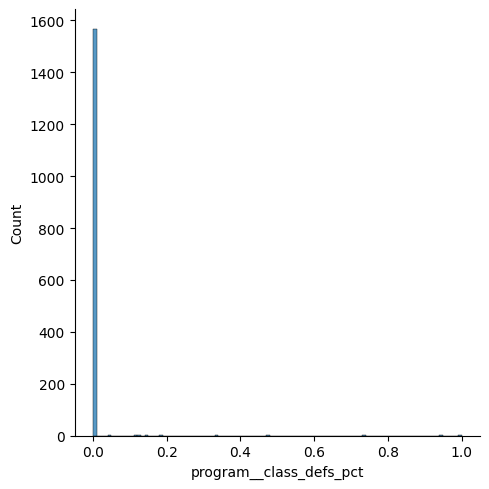

In [34]:
sns.displot(X['program__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [35]:
print_outliers_for_df_column(X, 'program__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9502651474300328
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.0 (Q1-3*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.0 (Q1-1.5*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 25 instancias tienen un valor para program__class_defs_pct superior a 0.0 (Q3+1.5*IQR) para program__class_defs_pct. Representando un 1.571% del total de instancias.
+3.0IQR: 25 instancias tienen un valor para program__class_defs_pct superior a 0.0 (Q3-3*IQR) para program__class_defs_pct. Representando un 1.571% del total de instancias.
L: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [36]:
X[X['program__class_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,25.00,25.0,25.000000,25.00,25.0,25.000000,25.000000,25.0,25.0,25.000000
mean,0.04,0.0,3.440000,0.04,0.0,0.386339,0.613661,0.0,1.0,5.596000
std,0.20,0.0,1.386843,0.20,0.0,0.356161,0.356161,0.0,0.0,5.652565
min,0.00,0.0,1.000000,0.00,0.0,0.045455,0.000000,0.0,1.0,0.750000
25%,0.00,0.0,3.000000,0.00,0.0,0.111111,0.269231,0.0,1.0,2.333333
50%,0.00,0.0,4.000000,0.00,0.0,0.187500,0.812500,0.0,1.0,4.500000
75%,0.00,0.0,4.000000,0.00,0.0,0.730769,0.888889,0.0,1.0,6.500000
max,1.00,0.0,6.000000,1.00,0.0,1.000000,0.954545,0.0,1.0,23.000000


### Variable function_defs_pct (9/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0,65.


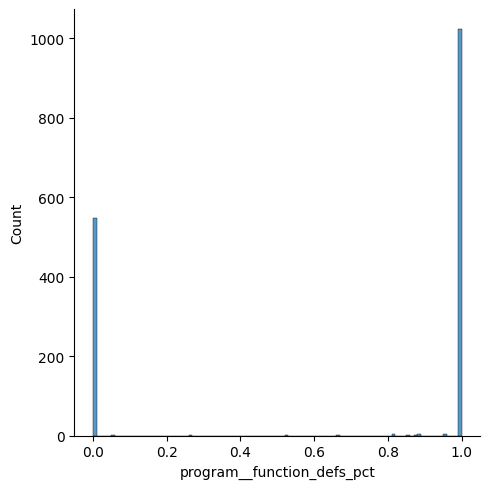

In [37]:
sns.displot(X['program__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [38]:
print_outliers_for_df_column(X, 'program__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.3376872137377519
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-5.790472897146853,1.4600407805890767]
-3.0IQR: 0 instancias tienen un valor para program__function_defs_pct inferior a -3.0 (Q1-3*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__function_defs_pct superior a 4.0 (Q3-3*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [39]:
X[(X['program__function_defs_pct'] > 0.0) & (X['program__function_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,22.000000,22.0,22.000000,22.000000,22.0,22.000000,22.000000,22.0,22.0,22.000000
mean,0.045455,0.0,3.363636,0.045455,0.0,0.302658,0.697342,0.0,1.0,6.256819
std,0.213201,0.0,1.465328,0.213201,0.0,0.289550,0.289550,0.0,0.0,5.718714
min,0.000000,0.0,1.000000,0.000000,0.0,0.045455,0.052632,0.0,1.0,2.250000
25%,0.000000,0.0,3.000000,0.000000,0.0,0.111111,0.557971,0.0,1.0,3.166667
50%,0.000000,0.0,3.000000,0.000000,0.0,0.165179,0.834821,0.0,1.0,5.333333
75%,0.000000,0.0,4.000000,0.000000,0.0,0.442029,0.888889,0.0,1.0,6.500000
max,1.000000,0.0,6.000000,1.000000,0.0,0.947368,0.954545,0.0,1.0,23.000000


### Variable enum_defs_pct (10/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con un maximo de 0.

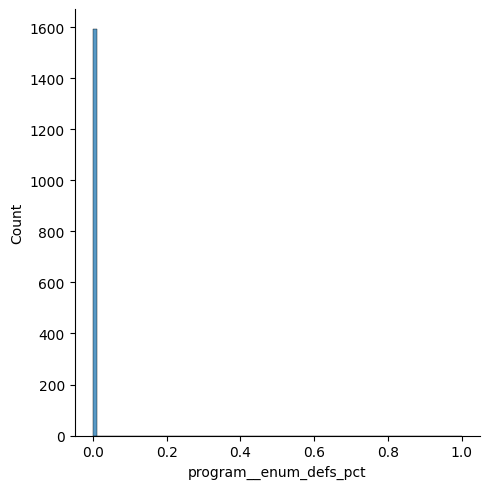

In [40]:
sns.displot(X['program__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [41]:
print_outliers_for_df_column(X, 'program__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para program__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__enum_defs_pct superior a 0.0 (Q3-3*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para program__enum_defs_pct inferior a 0.0 para program__enum_defs_pct. 

### IMPORTANTE
Todos los programas tienen el valor de la variable program__enum_defs_pct a 0.

In [42]:
X[X['program__enum_defs_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Multivariate

Isolation forest algorithm

In [43]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,program__program_id,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module,program__expertise_level
744,1623821,True,False,25,8,0,0.0,1.0,0.0,True,1.52,BEGINNER
1174,1832090,True,False,10,1,0,0.0,1.0,0.0,True,16.70,BEGINNER


### IMPORTANTE
Hay que revisar el outlier que se ha detectado.

In [44]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,2.0,1.000000,0.000000,1.00,1.000,1.000000,1.000000,1.000000
program__has_packages,2.0,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000
program__number_of_modules,2.0,17.500000,10.606602,10.00,13.750,17.500000,21.250000,25.000000
program__number_of_sub_dirs_with_code,2.0,4.500000,4.949748,1.00,2.750,4.500000,6.250000,8.000000
program__number_of_packages,2.0,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000
program__class_defs_pct,2.0,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000
program__function_defs_pct,2.0,1.000000,0.000000,1.00,1.000,1.000000,1.000000,1.000000
program__enum_defs_pct,2.0,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000
program__has_code_root_package,2.0,1.000000,0.000000,1.00,1.000,1.000000,1.000000,1.000000
program__average_defs_per_module,2.0,9.110001,10.733881,1.52,5.315,9.110001,12.905001,16.700001


In [45]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,1589.0,0.016362,0.126905,0.0,0.0,0.000000,0.0,1.0
program__has_packages,1589.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
program__number_of_modules,1589.0,2.441787,1.582306,1.0,1.0,3.000000,3.0,22.0
program__number_of_sub_dirs_with_code,1589.0,0.017621,0.140856,0.0,0.0,0.000000,0.0,2.0
program__number_of_packages,1589.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
program__class_defs_pct,1589.0,0.006078,0.065038,0.0,0.0,0.000000,0.0,1.0
program__function_defs_pct,1589.0,0.651568,0.474716,0.0,0.0,1.000000,1.0,1.0
program__enum_defs_pct,1589.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
program__has_code_root_package,1589.0,1.000000,0.000000,1.0,1.0,1.000000,1.0,1.0
program__average_defs_per_module,1589.0,1.756656,2.918344,0.0,0.0,0.666667,2.0,26.0
